In [13]:
# Load packages and classes
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tiffslide
import seaborn as sns
import gget
import tifffile
import zarr
import scanpy as sc

# MosaicDataset and BruceDataset classes allow loading and visualisation of the different data sources
from gbmhackathon import MosaicDataset

In [2]:
# Look at the available data sources
MosaicDataset.sources.keys()

dict_keys(['clinical', 'bulk_rna', 'spatial', 'sc_rna', 'wes', 'he'])

In [3]:
# The following cell will returns a dictionary with the data sources in the
# keys and the list of files (and path) used to return the data.
source_dict_mosaic = MosaicDataset.load_tabular()

In [4]:
# Load Visium data
visium_obj = MosaicDataset.load_visium(
    sample_list=["HK_G_022a_vis", "HK_G_024a_vis", "HK_G_030a_vis"], # remove this argument to load all available samples
    resolution="hires"
)

Resolution of the spatial image to load:  hires
You can change the resolution by setting the resolution parameter using the resolution argument.
Loading Visium data, this can take few minutes...


In [9]:
adata = ad.concat(visium_obj.values(), label="batch")

In [14]:
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

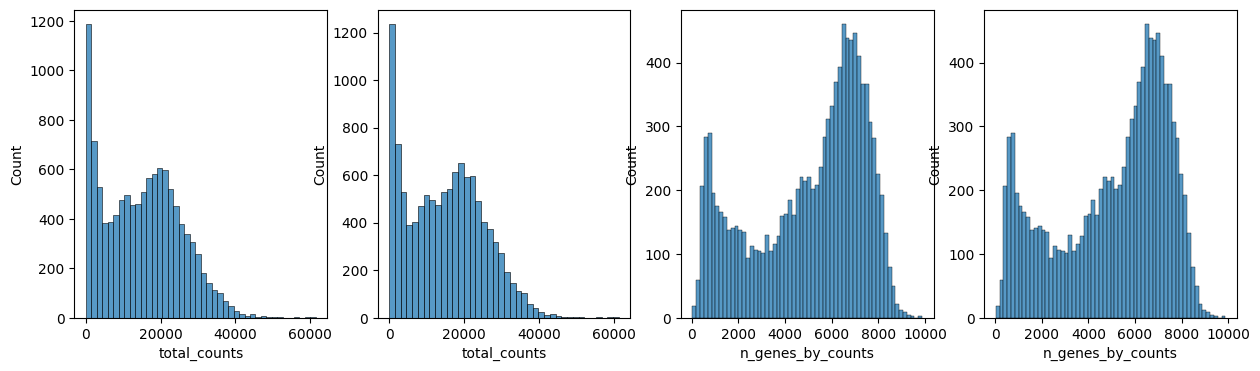

In [21]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.histplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.histplot(
    adata.obs["total_counts"],
    kde=False,
    bins=40,
    ax=axs[1],
)
sns.histplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.histplot(
    adata.obs["n_genes_by_counts"],
    kde=False,
    bins=60,
    ax=axs[3],
)
plt.show()

In [22]:
sc.pp.filter_cells(adata, min_counts=5000)
sc.pp.filter_genes(adata, min_cells=10)

In [23]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)

In [24]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(
    adata, key_added="clusters", flavor="igraph", directed=False, n_iterations=2
)

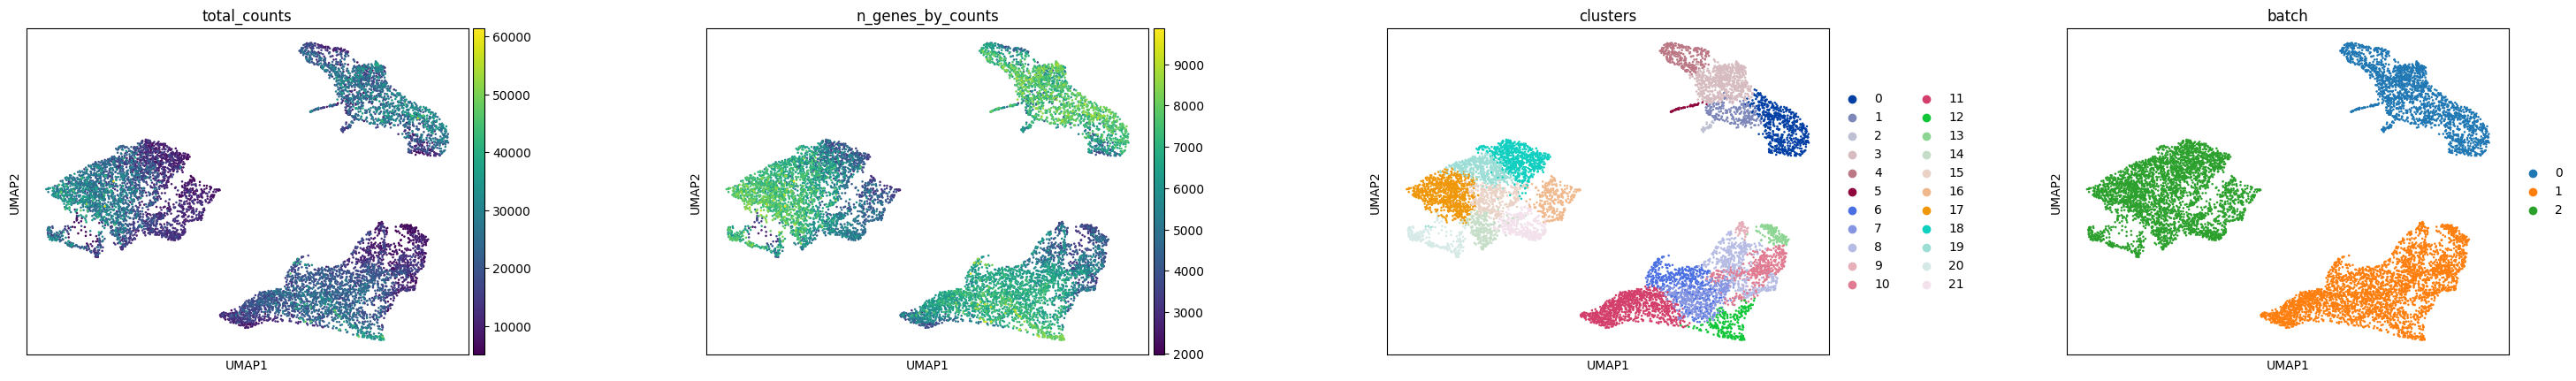

In [25]:
sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "clusters", "batch"], wspace=0.4)

In [26]:
adata.obsm

AxisArrays with keys: spatial, X_pca, X_umap

In [27]:
import spatialdata

ModuleNotFoundError: No module named 'spatialdata'